In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### Define basic parameter

In [2]:
region_en = 'xinan'

In [3]:
year_range = [f'{i}_{i+2}' for i in range(1990,2020,3)]

In [4]:
# define the year range
year_start = [i for i in range(1990,2018,3)]
year_end   = [i for i in range(1992,2020,3)]

year_name = [f'{i[0]}_{i[1]}' for i in zip(year_start,year_end)]

In [5]:
year_name

['1990_1992',
 '1993_1995',
 '1996_1998',
 '1999_2001',
 '2002_2004',
 '2005_2007',
 '2008_2010',
 '2011_2013',
 '2014_2016',
 '2017_2019']

##### Loop through each_year and each_size to dermine a suitable size for input sample

In [6]:
Sample_size_acc = {}
size_list = list(np.arange(0.05,0.98,0.05)) + list(np.arange(0.98,0.99,0.005)) + list(np.arange(0.99,0.9999,0.003))

for year in year_name:
    for size in size_list[::-1]:
        
        # get the names of train and test
        train_name = f'Training_sample_{region_en}_{year}'
        test_name  = f'Grid_select_{region_en}_{year}'    
        
        # import traning sample
        train_sample = pd.read_csv(f'./Data/{train_name}.csv')
        train_sample = train_sample.drop(['system:index','.geo'],axis=1)
        # train_test split to reduce the the sample size
        X = train_sample.drop('Built',1)
        y = train_sample['Built']
        X_train, _, y_train, _ = train_test_split(X, y, test_size=size,random_state=42,stratify =y )
        
        # import testing sample
        test_sample = pd.read_csv(f'./Data/{test_name}.csv')
        test_sample = test_sample.drop(['system:index','.geo'],axis=1)
        # get the X,y value
        X_test = test_sample.drop('Built',1)
        y_test = test_sample['Built']        
        

        # perform the RF classification
        RF = RandomForestClassifier(n_estimators=100,n_jobs=-1)
        RF.fit(X_train,y_train)
        y_pred = RF.predict(X_test)

        # get the accuracy, here get two kinds of accuracy
        acc_test = accuracy_score(y_test,y_pred)

        # add results to the acc_dict
        Sample_size_acc[(region_en,year,f'{(1-size)*100:.2f}',)] = [acc_test]

        # print out the process
        print(f'Accuracy calculation of {train_name}_{(1-size)*100:.2f} finished!')

Accuracy calculation of Training_sample_xinan_1990_1992_0.10 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_0.40 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_0.70 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_1.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_1.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_1.50 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_2.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_5.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_10.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_15.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_20.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_25.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_30.00 finished!
Accuracy calculation of Training_sample_xinan_1990_1992_35.00 finished!


Accuracy calculation of Training_sample_xinan_2002_2004_25.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_30.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_35.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_40.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_45.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_50.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_55.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_60.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_65.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_70.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_75.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_80.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_85.00 finished!
Accuracy calculation of Training_sample_xinan_2002_2004_90.00 fi

Accuracy calculation of Training_sample_xinan_2014_2016_80.00 finished!
Accuracy calculation of Training_sample_xinan_2014_2016_85.00 finished!
Accuracy calculation of Training_sample_xinan_2014_2016_90.00 finished!
Accuracy calculation of Training_sample_xinan_2014_2016_95.00 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_0.10 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_0.40 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_0.70 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_1.00 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_1.00 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_1.50 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_2.00 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_5.00 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_10.00 finished!
Accuracy calculation of Training_sample_xinan_2017_2019_15.00 finished!


In [7]:
# formating the result and put it into a datafram
Size_accuracy = pd.DataFrame(Sample_size_acc).T
Size_accuracy.reset_index(inplace=True)
Size_accuracy.columns = ['Region','Year','Sample_size','Accuracy']

Size_accuracy['Year'] = Size_accuracy['Year'].astype('category')
Size_accuracy.sort_values(['Year','Sample_size'],inplace=True)
Size_accuracy.reset_index(inplace=True,drop=True)

# save the datafram to disk
Size_accuracy.to_csv(f'./Result/Sample_size_acc_{region_en}.csv',index=False)
Size_accuracy = pd.read_csv(f'./Result/Sample_size_acc_{region_en}.csv')

##### Observe that 50% of the sample is enought for classification

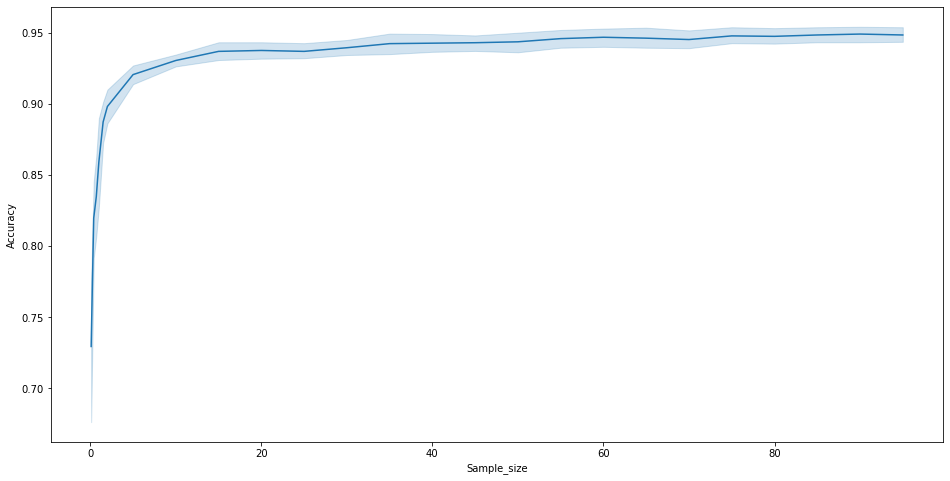

In [8]:
plt.figure(figsize=[16,8])
sns.lineplot(data=Size_accuracy,x='Sample_size',y='Accuracy')

##### Compare all region's accuracy

In [9]:
All_accuracy = []

for region in ['dongbei','huadong','zhongnan','xinan','xibei','NCP']:
    
    df = pd.read_csv(f'./Result/Sample_size_acc_{region}.csv')    
    All_accuracy.append(df)

In [10]:
# concat all accuracy into one df
All_accurac_df = pd.concat(All_accuracy,0)

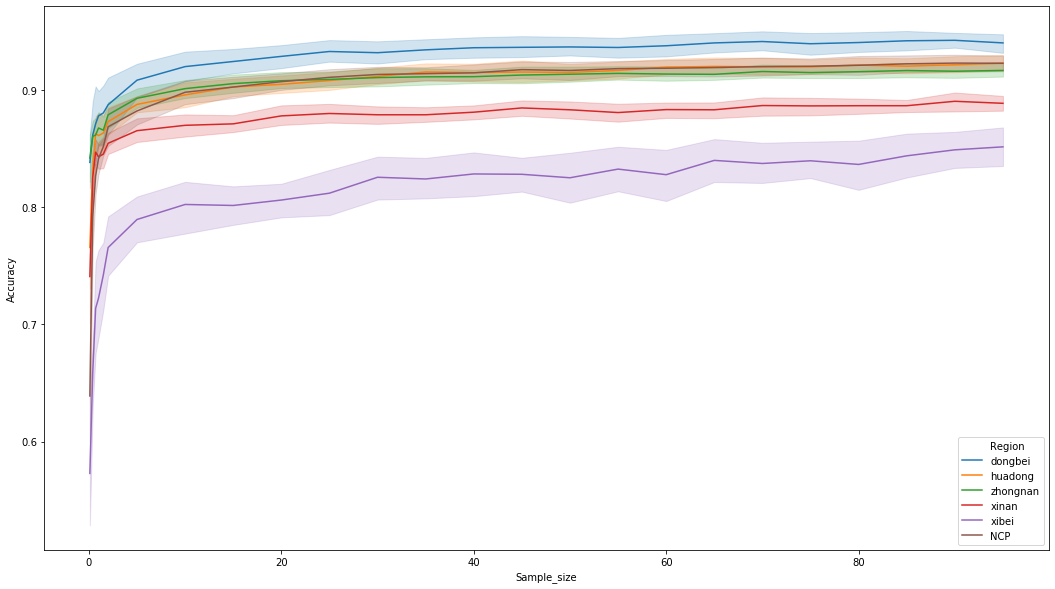

In [11]:
plt.figure(figsize=(18,10))
sns.lineplot(data = All_accurac_df,x='Sample_size',y='Accuracy',hue='Region')